In [2]:
import pandas as pd

# Load the CSV
df = pd.read_csv('file:///Users/kanishtyagi/Downloads/health_center_attrition.csv')

# View first 5 rows
df.head()

# Check the data shape (Know how many rows/columns there are)
print("Shape:",df.shape)

# Data types and nulls (Understand what each column looks like (types, nulls))
df.info()

# Basic statistics for numerical columns (See if the data needs cleaning)
df.describe()

# Look at churn distribution (Check class balance (how many churned vs not churned))
df['Churned'].value_counts()


# Convert categorical columns
df['Gender'] = df['Gender'].astype('category')
df['Chronic_Disease'] = df['Chronic_Disease'].astype('category')
df['Insurance'] = df['Insurance'].astype('category')

# Optional: Rename columns (for nicer formatting later)
df.columns = df.columns.str.replace("_", " ").str.title()

# Check again
df.info()


Shape: (300, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           300 non-null    int64  
 1   Age                  300 non-null    int64  
 2   Gender               300 non-null    object 
 3   Visits_Per_Year      300 non-null    int64  
 4   Chronic_Disease      300 non-null    object 
 5   Distance_km          300 non-null    float64
 6   Insurance            228 non-null    object 
 7   Satisfaction_Score   300 non-null    int64  
 8   Last_Visit_Days_Ago  300 non-null    int64  
 9   Churned              300 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 23.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Pat

Matplotlib is building the font cache; this may take a moment.


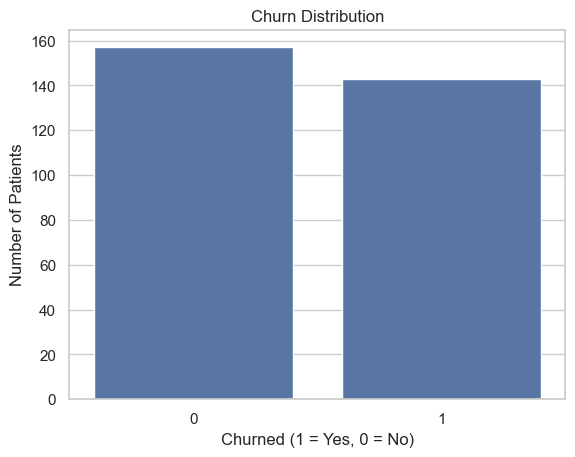

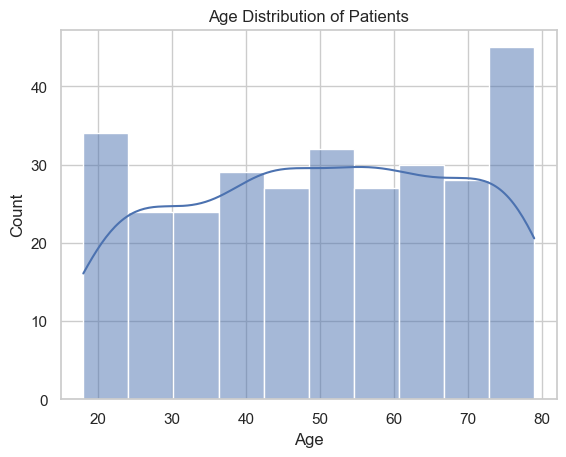

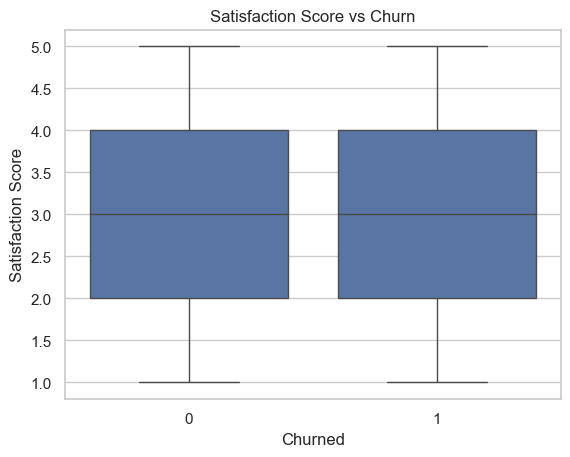

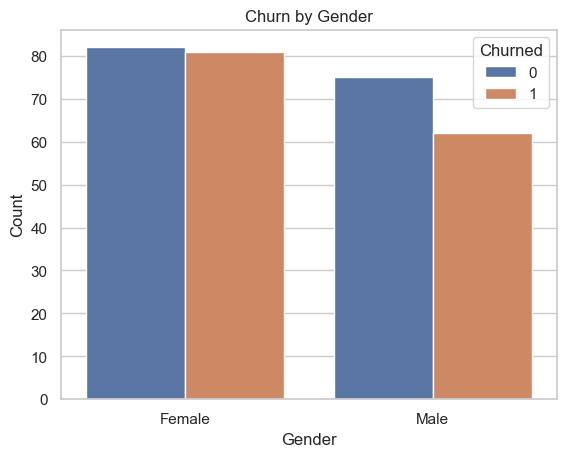

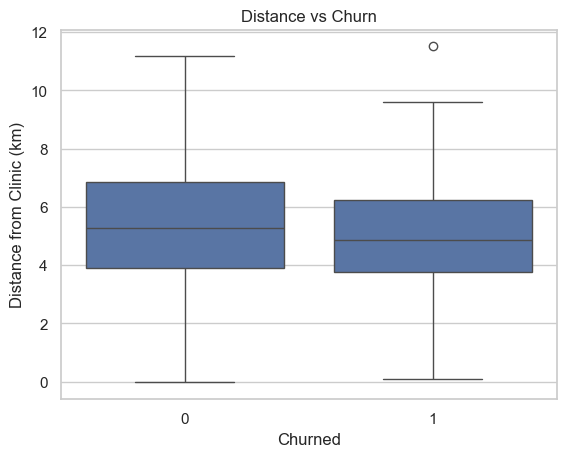

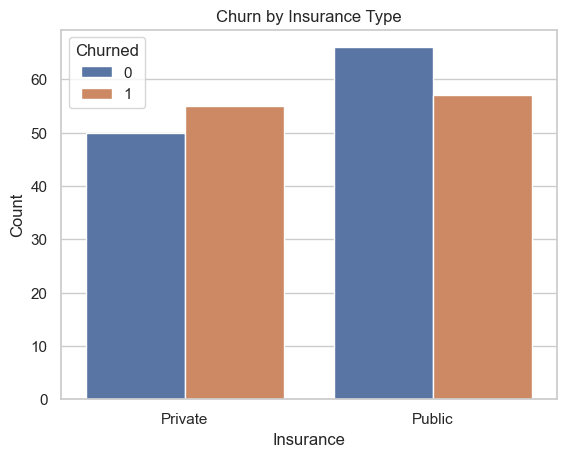

In [3]:
# 📦 Import necessary libraries for plotting
import matplotlib.pyplot as plt     # Used to create basic plots
import seaborn as sns               # Built on top of matplotlib; makes plots prettier and easier

# 🎨 Optional: Set style for seaborn to look cleaner
sns.set(style="whitegrid")          # 'whitegrid' adds light grid lines to background

# 🔢 Count how many patients churned (1) vs. stayed (0)
sns.countplot(data=df, x="Churned")  # 'x' is the column for x-axis; seaborn auto-counts values
plt.title("Churn Distribution")      # Title for the chart
plt.xlabel("Churned (1 = Yes, 0 = No)")  # Label for X-axis
plt.ylabel("Number of Patients")     # Label for Y-axis
plt.show()                           # Display the plot

# 📊 Show the spread of ages using a histogram
sns.histplot(df["Age"], bins=10, kde=True)  # 'bins=10' means divide into 10 age ranges; 'kde=True' shows smooth line
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 📦 Use a box plot to compare satisfaction scores for churned vs. non-churned
sns.boxplot(data=df, x="Churned", y="Satisfaction Score")
plt.title("Satisfaction Score vs Churn")
plt.xlabel("Churned")               # 0 = not churned, 1 = churned
plt.ylabel("Satisfaction Score")    # Score between 1 and 5
plt.show()

# 🧍‍♂️🧍‍♀️ Show how churn is distributed between genders using grouped bars
sns.countplot(data=df, x="Gender", hue="Churned")  # 'hue' breaks bars into churned and not churned
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 📍 Box plot to compare distance for churned vs. non-churned patients
sns.boxplot(data=df, x="Churned", y="Distance Km")
plt.title("Distance vs Churn")
plt.xlabel("Churned")
plt.ylabel("Distance from Clinic (km)")
plt.show()

# 💳 See if insurance type affects whether someone churns
sns.countplot(data=df, x="Insurance", hue="Churned")
plt.title("Churn by Insurance Type")
plt.xlabel("Insurance")
plt.ylabel("Count")
plt.show()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split      # To split data into training/testing
from sklearn.linear_model import LogisticRegression       # The model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluation

# First, copy the dataset so original stays unchanged
model_df = df.copy()

# Convert categories to numeric using one-hot encoding
model_df = pd.get_dummies(model_df, drop_first=True)

# Show new columns after encoding
model_df.head()

# Define target (what we want to predict)
y = model_df['Churned']

# Define features (columns used to predict churn)
X = model_df.drop('Churned', axis=1)

# Split into train/test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show shape to confirm
print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Create model
model = LogisticRegression(max_iter=1000)  # max_iter helps with convergence

# Train it on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Show confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Full classification report
print("Classification Report:\n", classification_report(y_test, y_pred))



Training shape: (240, 9)
Test shape: (60, 9)
Accuracy: 0.9833333333333333
Confusion Matrix:
 [[39  1]
 [ 0 20]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.95      1.00      0.98        20

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



In [5]:
!pwd

/Users/kanishtyagi/Data-Analytics-Prep
